## Serevina Sherly Maulida - 1227050123

## 1. Eksperimen Kompresi JPEG

In [1]:
import cv2

image = cv2.imread('sample.jpg')

qualities = [10, 30, 50, 70, 90]
for q in qualities:
    filename = f'compressed_{q}.jpg'
    cv2.imwrite(filename, image, [cv2.IMWRITE_JPEG_QUALITY, q])
    print(f"Kompresi selesai untuk kualitas {q}, lihat file '{filename}'")


Kompresi selesai untuk kualitas 10, lihat file 'compressed_10.jpg'
Kompresi selesai untuk kualitas 30, lihat file 'compressed_30.jpg'
Kompresi selesai untuk kualitas 50, lihat file 'compressed_50.jpg'
Kompresi selesai untuk kualitas 70, lihat file 'compressed_70.jpg'
Kompresi selesai untuk kualitas 90, lihat file 'compressed_90.jpg'



# 2. Implementasi Huffman Encoding untuk Teks Panjang

In [2]:
from heapq import heappush, heappop, heapify
from collections import Counter

def huffman_coding(data):
    freq = Counter(data)
    heap = [[weight, [symbol, ""]] for symbol, weight in freq.items()]
    heapify(heap)
    
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

text = "Ini adalah contoh teks yang lebih panjang untuk Huffman Encoding"
huffman_code = huffman_coding(text)
print("Kode Huffman:", huffman_code)


Kode Huffman: {' ': '101', 'a': '010', 'n': '110', 'o': '0000', 't': '0001', 'u': '0010', 'c': '01101', 'd': '01110', 'e': '01111', 'f': '10000', 'g': '11101', 'h': '11110', 'i': '11111', 'k': '10010', 'l': '10011', 'y': '00110', 'E': '001110', 'H': '001111', 'I': '011000', 'b': '011001', 'j': '100010', 'm': '100011', 'p': '111000', 's': '111001'}


## 3. Eksperimen dengan Berbagai Kernel Filter

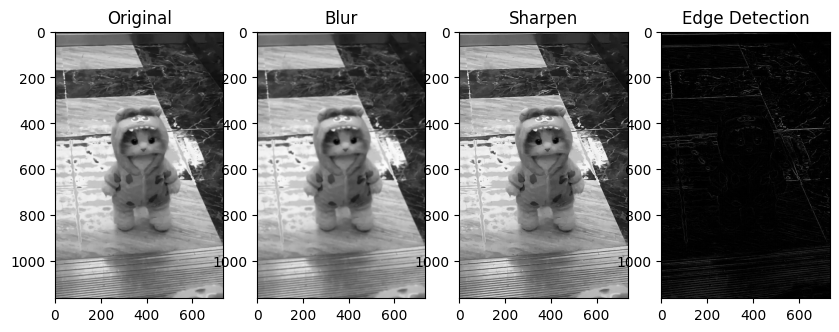

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('sample.jpg', 0)

filters = {
    "Blur": np.ones((5,5), np.float32) / 25,
    "Sharpen": np.array([[0,-1,0], [-1,5,-1], [0,-1,0]]),
    "Edge Detection": np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
}

plt.figure(figsize=(10,5))
plt.subplot(1, len(filters)+1, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

for i, (name, kernel) in enumerate(filters.items()):
    filtered = cv2.filter2D(image, -1, kernel)
    plt.subplot(1, len(filters)+1, i+2)
    plt.imshow(filtered, cmap='gray')
    plt.title(name)

plt.show()


## 4. Eksperimen Edge Detection dengan Berbagai Parameter

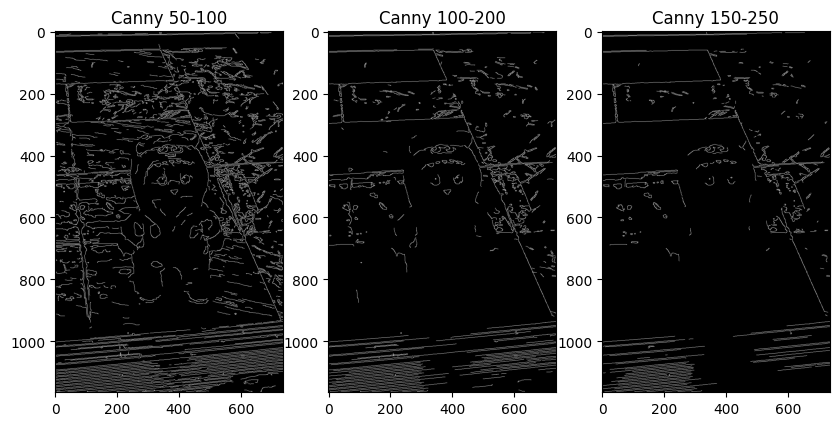

In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sample.jpg', 0)

parameters = [(50, 100), (100, 200), (150, 250)]
plt.figure(figsize=(10,5))

for i, (low, high) in enumerate(parameters):
    edges = cv2.Canny(image, low, high)
    plt.subplot(1, len(parameters), i+1)
    plt.imshow(edges, cmap='gray')
    plt.title(f"Canny {low}-{high}")

plt.show()


## 5. Eksperimen Transformasi Fourier pada Gambar Berbeda

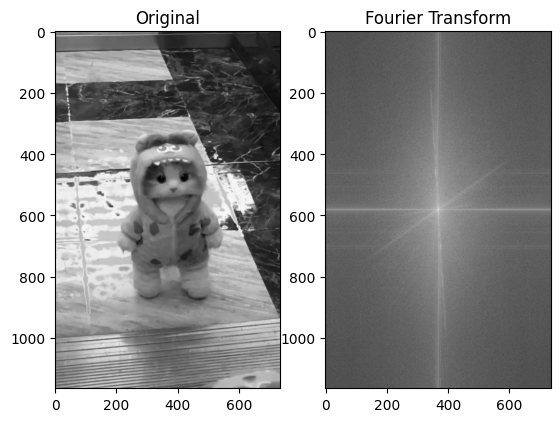

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sample.jpg', 0)

dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(np.abs(dft_shift))

plt.subplot(1,2,1), plt.imshow(image, cmap='gray'), plt.title("Original")
plt.subplot(1,2,2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title("Fourier Transform")
plt.show()
